In [53]:
import pint
import numpy as np
from sympy import symbols, solve, Eq

ureg = pint.get_application_registry()
Q_ = ureg.Quantity
epsilon_0 = Q_(8.85e-12, 'C^2/(N * m^2)')
k_value = 1 / (4 * 3.14159 * epsilon_0)  # Coulomb's constant
q_electron = Q_(-1.602e-19, 'C')
q_proton = - q_electron
avogadro_number = Q_(6.022e23, '1/mol')
mass_proton = Q_(1.672e-27, 'kg')
mass_electron = Q_(9.109e-31, 'kg')
mu_0 = Q_(4e-7 * np.pi, 'T * m/A')

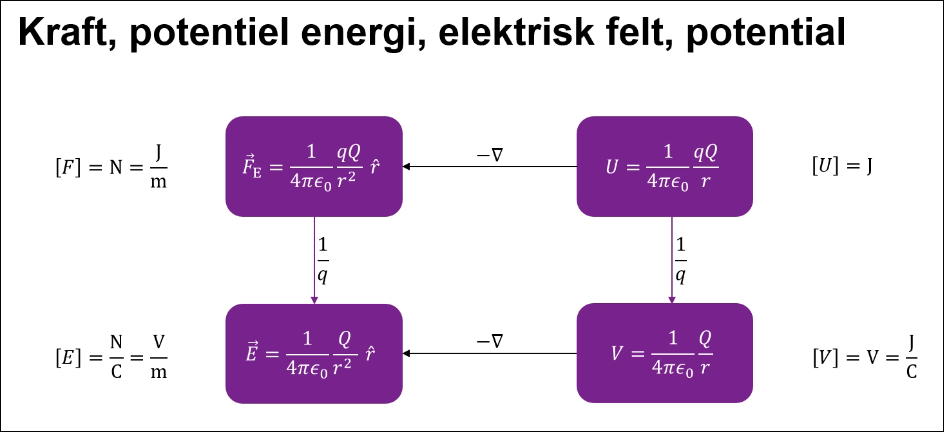

$$
\frac{I}{neA} = \frac{V}{lB}
$$

# Exercise 1
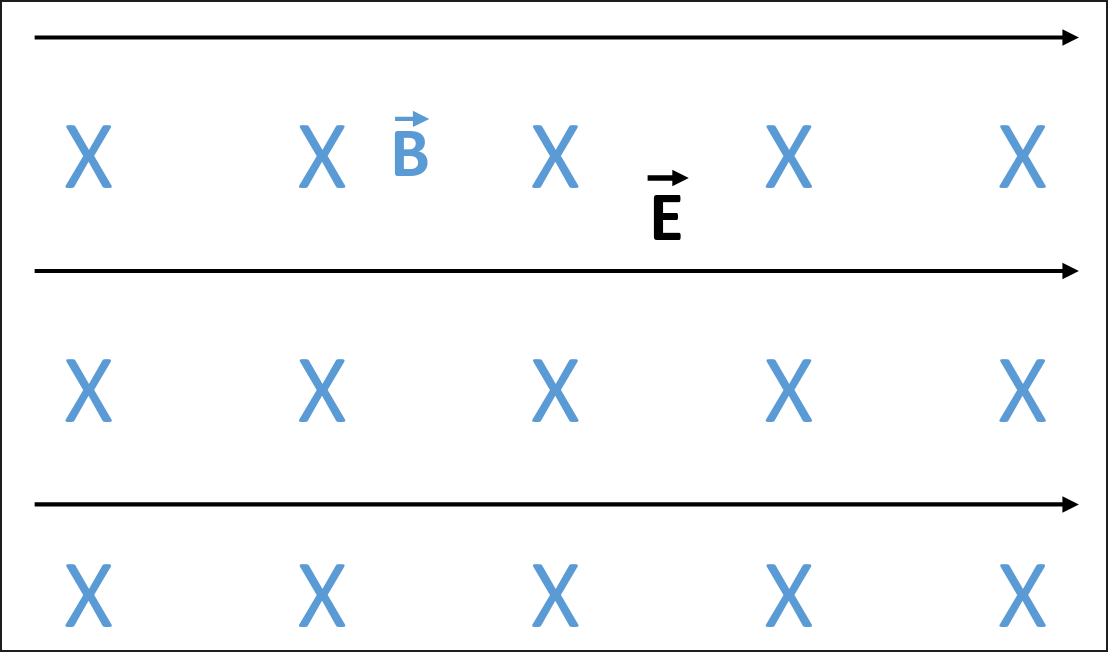

An electron with elementary charge –e is first accelerated by a constant electric field $E_a=2.5 \cdot 10^2$
V/m over a distance L=0.73 m, after which it is observed to move in a straight line in the
combined E- and B-fields shown in the figure.

a) Determine the speed of the electron after the acceleration phase.

b) If the electric field strength $E=3.5 \cdot 10^4$ V/m, what is then the magnetic field strength B?

#### Answer
a)

We can use the work energy theorem. The kinetic energy is $KE = 1/2 mv^2$ and the work is entirely converted into it's kinetic energy. The work done can also be describes as force pr distance:
$$
W = F \cdot L
$$
We know that the force is based on the constant electrical field, so
$$
F = qE_a
$$
we now have
$$
W = (qE_a) \cdot L
$$
We can now find the speed
$$
KE = W \Leftrightarrow \frac{1}{2}mv^2 = eE_a L
$$
where v is equal to
$$
v = \sqrt{\frac{2eE_a L}{m}}
$$

In [54]:
E_a = Q_(2.5e2, 'V/m')
L = Q_(0.73, 'm')

v = np.sqrt(2 * abs(q_electron) * E_a * L / mass_electron)
print(f"The final speed of the electron is {v.to('m/s'):.3e}")

The final speed of the electron is 8.012e+06 meter / second


b)

We know that the electron is moving in a straight line, which means that the forces must cancel out. Therefore the force from the electric field $F_e$ must equal the magnetic force $F_m$ in their magnitude.

We know that the electric field E points right. Since the electron's charge ($q=−e$) is negative, the electric force $F_e$​ points left and the magnetic must point right.

The magnitude of a magnetic force is defined by:
$$
F_m = qvB\sin{\theta}
$$
We also know that the angle $\theta$ must be 90 for the angles to perpendicular, so we have
$$
F_m = qvB\sin{90\degree} = qvB
$$
We now have
$$
F_m = F_e \Leftrightarrow evB = eE
$$
we can now solve for B
$$
B = \frac{E}{v}
$$

In [55]:
E = Q_(3.5e4, 'V/m')
B = E / v
print(f"The magnetic field strength is {B.to('T'):.3e}")

The magnetic field strength is 4.368e-03 tesla


# Exercise 2
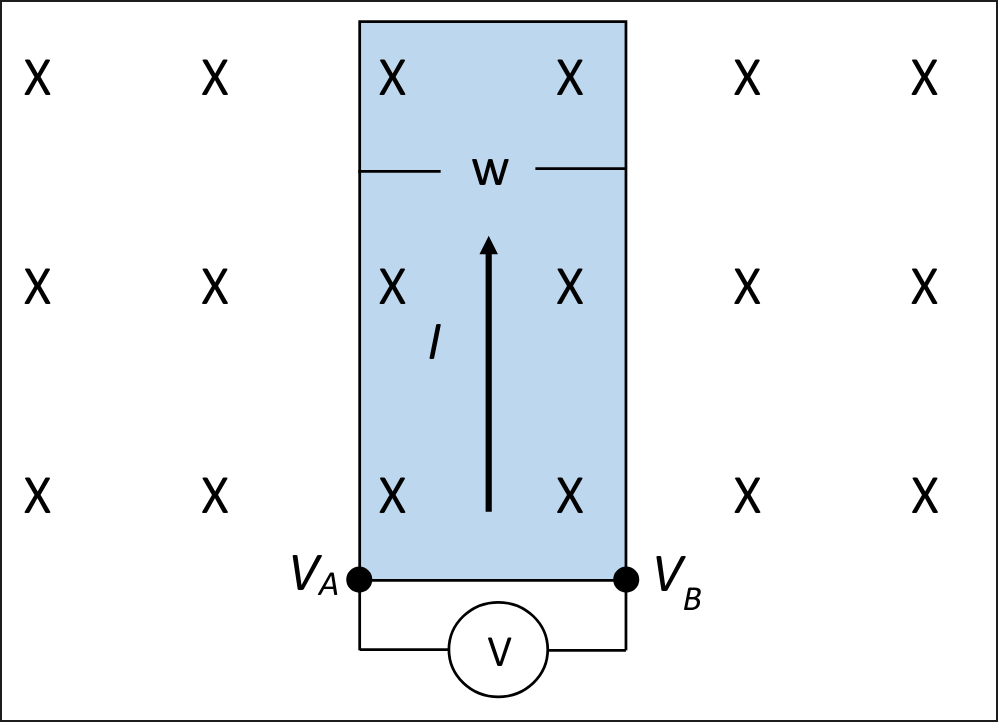

We attempt to measure the strength of a magnetic field using a Hall-sensor consisting of a
semiconductor strip having a width w=4.2 cm and a thickness h=0.5 cm perpendicular to the
plane of the figure. The magnetic field B points into the plane as shown, and has a field strength
of $1.0 \cdot 10^{-4}$ T. The charge carrier density of the semiconductor is $n=3.5 \cdot 10^{21} m^{-3}$ and the charge
carriers are positive elementary charges. We drive a current I=10.0 mA through the
semiconductor directed upward in the figure as shown.

a) Determine the direction of the magnetic (Lorentz) force on the charge carriers in the
semiconductor.

b) Determine the direction of the transverse electric field over the semiconductor needed to
achieve equilibrium, i.e. that the sum of transverse electric and magnetic forces is zero. Does the
potential difference $V_B-V_A$ become positive or negative?

c) Determine an expression and a value for $V_B-V_A$ as registered on the voltmeter.

#### Answer
For this we will make use of the Hall Effect, which describes how a magnetic field creates a voltage (the Hall voltage) across a current-carrying conductor.

a)

To find the direction we can apply the right hand rule. The magnetic force $F_B$ is given by the Lorentz force equation: $F_B​=q(v \times B)$. We use the right-hand rule to find the direction of the cross product $v \times B$. This is right in this case.

b) 

From a) we know that the magnetic force i directed to the right, so for the magnetic force to cancel it out it would need to be directed to the left. We also know that the magnitude of tje electric field is defined as
$$
F_E = qE
$$
Now for the potential difference we know that the potential is highest where the positive charges accumulate. As we know the electric force points left there must be more negative electrons there, so the positive side is B and the negative is A. So $V_B$ is at a higher potential than $V_A$. So $V_B - V_A$ must be positive.

c)

Now we can use the magnitude of $F_B = qv_dB$, we then get
$$
qE = qv_dB \Leftrightarrow E = v_dB
$$

We also know that the Hall voltage $V_H = V_B - V_A$ is the electric field E multiplied by the distance w over which it acts.
$$
V_H = E w = v_d B w
$$

The issue we now have is that we do not know v_d, but we do know that the electric current (I) is defined as the total amount of charge ($\Delta Q$) that passes through a certain cross-sectional area (A) in a given amount of time ($\Delta t$).
$$
I = \frac{\Delta Q}{\Delta t}
$$
where
$$
\Delta Q = N \cdot q = (n w h v_d \Delta t) q
$$
Now we have
$$
I = \frac{(n w h v_d \Delta t) q}{\Delta t} = (n w h v_d)q
$$
Now we can solve for v_d
$$
v_d = \frac{I}{q n w h}
$$

In [56]:
w = Q_(4.2, 'cm')
h = Q_(0.5, 'cm')
B = Q_(1e-4, 'T')
n = Q_(3.5e21, 'm^-3')
I = Q_(10.0, 'mA')

q = q_proton # We are told it is a positive charge
V_H = (I / (n * q * w * h)) * B * w

print(f"The Hall voltage is equal to {V_H.to('V'):.1e}")

The Hall voltage is equal to 3.6e-07 volt


# Exercise 3
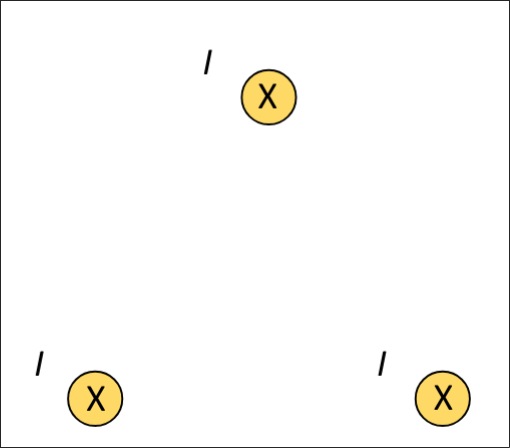

Three long straight wires are arranged in an equilateral triangle as shown in the figure. In all
three wires a current flows directed into the plane shown, and the magnitude of the current I is
the same in all the wires. Where is the resultant magnetic force on the top wire directed?

A) Upwards

B) Downwards

C) Into the plane

D) Out of the plane

E) Towards the left

F) Towards the right

G) Another direction

H) The resultant force is zero.

I) Don't know

#### Answer

As the wires have a current that goes in the same direction they attract each other. So it is pulled down toward left and right resulting in a total downward force B).

# Exercise 4
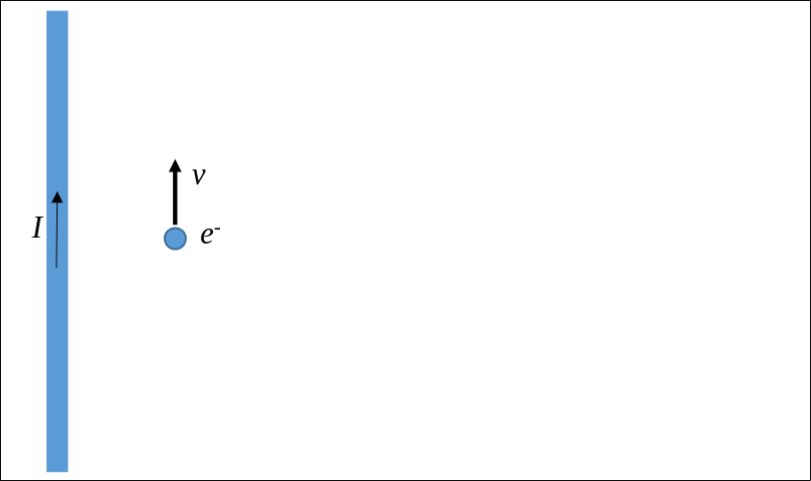

An electron moves with a speed of $3.5 \cdot 10^6$ m/s parallel to a wire carrying a current I=2.7 A, as
shown in the figure. The distance from the electron to the center of the wire is 12 cm. Determine
the magnitude and direction of the magnetic force on the electron from the wire.

A) $1.3 \cdot 10^{-18}$ N, towards the right

B) $2.5 \cdot 10^{-18}$ N, towards the right

C) $5.0 \cdot 10^{-18}$ N, towards the right

D) $7.4 \cdot 10^{-18}$ N, towards the right

E) $1.3 \cdot 10^{-18}$ N, towards the left

F) $2.5 \cdot 10^{-18}$ N, towards the left

G) $5.0 \cdot 10^{-18}$ N, towards the left

H) $7.4 \cdot 10^{-18}$ N, towards the left

I) Don’t know

#### Answer

Using the right hand rule we can quickly identify that the electron must move towards the right. For the magnitude we use the formula:
$$
F = qvB
$$
where we can use the formula "Magnetic field from a straight wire"
$$
B = \frac{\mu_0 I}{2\pi R}
$$

In [57]:
q = abs(q_electron) # As we are looking at a magnitude
v = Q_(3.5e6, 'm/s')
I = Q_(2.7, 'A')
R = Q_(12, 'cm')

B = mu_0 * I / (2 * np.pi * R)
F = q * v * B

print(f"The magnetic force on the charge is {F.to('N'):.3e}")

The magnetic force on the charge is 2.523e-18 newton


# Exercise 5
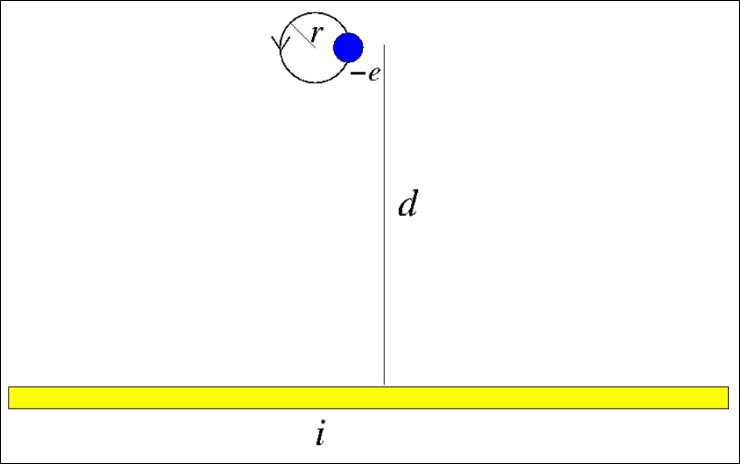

An electron moves in a circle in the magnetic field from an infinitely long straight wire, carrying
a current i as shown in the figure. The electron is at a distance d=1.0 cm from the wire, and the
radius of the circular path, r, is sufficiently small that the magnetic field from the wire can be
assumed constant over the extent of the circle. The frequency of the electron’s periodic
movement is observed to be $1.0 \cdot 10^7 s^{-1}$. Find the magnitude and direction of the current in the
wire.

A) i=2.8 A, towards the left

B) i=2.8 A, towards the right

C) i=1.4 A, towards the left

D) i=1.4 A, towards the right

E) i=17.9 A, towards the left

F) i=17.9 A, towards the right

G) Don’t know

#### Answer

The electron is moving in a circle. This requires a centripetal force pointing towards the center of the circle (downwards, towards the wire). This force is provided by the magnetic (Lorentz) force, $F_B​$. We also know that the particle is an electron, so q is negative and that the electron is moving counter-clockwise. 

We can now use the Lorentz force law:
$$
F_B = q(v \times B)
$$
With this we know that the product $(v \times B)$ is pointed downwards but as we are working with an electron q is negative and $F_B$ points upwards.

For v we can analyze it at the top where it points left, base on this we get that the magnetic field B at the electron's location must be pointing out of the plane.

Now for the current we can easily identify that to point out on the plane the thumb would have to point right via the right hand rule for this to be true, so the current runs right.

Now we can calculate the magnitude of the current.
$$
F_c = F_B
$$
where $F_c$ is the centripetal force ($F_c = \frac{mv^2}{r}$), we now have
$$
\frac{mv^2}{r} = |q|vB
$$
We just have the issue that we don't know the speed of the electron, but instead we are given the frequency of the electron. The speed v is related to frequency by $v=(2 \pi r)f$ (circumference x frequency)
$$
\frac{m(2 \pi rf)^2}{r} = |q|(2 \pi rf)B
$$
$$
\Leftrightarrow \frac{m(2 \pi rf)}{r} = |q|B \Leftrightarrow 2 m \pi f = |q|B
$$
now we can solve for B
$$
B = \frac{2 m \pi f}{|q|}
$$

In [58]:
m = mass_electron
f = Q_(1e7, 's^-1')
B = 2 * np.pi * m * f / abs(q_electron)
print(f"The magnetic field strength is {B.to('T'):.3e}")

The magnetic field strength is 3.573e-04 tesla


Now we use the formula for the magnetic field from a long, straight wire at a distance d.
$$
B = \frac{\mu_0 I}{2 \pi R}
$$
we rearrange to solve for I
$$
I = \frac{2 \pi R B}{\mu_0}
$$

In [59]:
R = Q_(1, 'cm')
I = 2 * np.pi * R * B / mu_0
print(f"The current is {I.to('A'):.1f}")

The current is 17.9 ampere


# Exercise 6
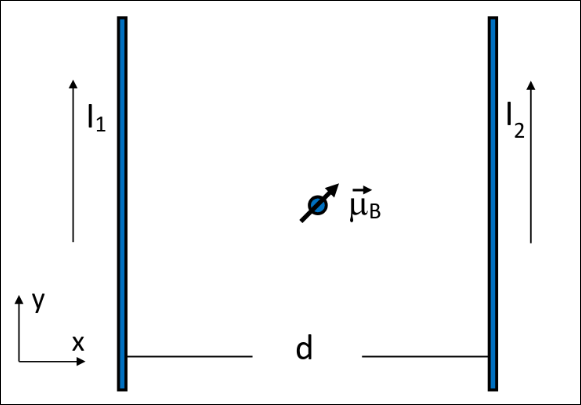

Two infinitely long straight wires are orienter in parallel with a separation of 𝑑 = 10.0 cm. An
atom having a magnetic moment of $\mu B = 9.27 \cdot 10^{−24}$ J/T oriented at an angle of 45 degrees
with the x-axis (see figure) is situated exactly at the midpoint between the two wires, which carry
the currents $I_1$ = 3.00 A and $I_2$ = 10.0 A. Determine the x-component of the torque $\vec{\tau}$ on the
atom from the magnetic field generated by the two wires.

A) $\tau x = 1.84 \cdot 10^{−28}$ Nm

B) $\tau x = 2.41 \cdot 10^{−28}$ Nm

C) $\tau x = 3.41 \cdot 10^{−28}$ Nm

D) $\tau x = −1.84 \cdot 10^{−28}$ Nm

E) $\tau x = −2.41 \cdot 10^{−28}$ Nm

F) $\tau x = −3.41 \cdot 10^{−28}$ Nm

G) Don’t know

#### Answer
We use the right-hand grip rule to find the direction of the magnetic field from each wire and the formula 
$$
B=\frac{\mu_0​I​}{2\pi r} 
$$
for the magnitude. 

Now lets do it for $I_1$, where we quickly see that the magnetic field points into the plane. For $I_2$ we see that it points out of the plane.

In [60]:
d = Q_(10, 'cm').to('m')
muB = Q_(9.27e-24, 'J/T')
theta = Q_(45, 'deg')
I1 = Q_(3, 'A')
I2 = Q_(10, 'A')

B1 = - mu_0 * I1 / (2 * np.pi * (d/2)) # -z direction
B2 = mu_0 * I2 / (2 * np.pi * (d/2)) # +z direction

# Net field
B = B1 + B2 # This is Bz as we point out or into the plane

print(f"The net field is {B:.2e}")

The net field is 2.80e-05 tesla


Now we to use the magnetic moment $\mu B​$ which has a magnitude of $\mu=9.27 \cdot 10^{−24}$ J/T. It lies in the x-y plane at an angle of 45° with the x-axis.
* x-component: $\mu x​=\mu cos(45 \deg)$
* y-component: $\mu x​=\mu sin(45 \deg)$
* z-component: 0 (since we are in the x-y plane)


In [61]:
mu = Q_(9.27e-24, 'J/T')
mu_x = mu * np.cos(theta)
mu_y = mu * np.sin(theta)

print(f"mu_x: {mu_x:.2e}, mu_y: {mu_y:.2e}")

mu_x: 6.55e-24 joule / tesla, mu_y: 6.55e-24 joule / tesla


The formula for torque is the cross product $\tau=\mu B$. To find only the x-component of the torque ($\tau_x​$), we use the formula:
$$
\tau = \mu_y B_z - \mu_z B_y
$$

In [62]:
tau_x = mu_x * B
print(f"tau_x: {tau_x:.2e}")

tau_x: 1.84e-28 joule


So the answer is A) 